<h4>Importing Libraries</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h4>Import the dataset</h4>

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Male", "Female"])

dataset = pd.read_csv("Mall_Customers.csv")

dataset = dataset.apply(LabelEncoder().fit_transform)

x = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, -1].values

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,1,0,30
1,1,1,3,0,67
2,2,0,2,1,4
3,3,0,5,1,64
4,4,0,13,2,31
...,...,...,...,...,...
195,195,0,17,61,66
196,196,0,27,62,23
197,197,1,14,62,61
198,198,1,14,63,16


<h4>using the dendrogram to find the optimal number of cluster</h4>

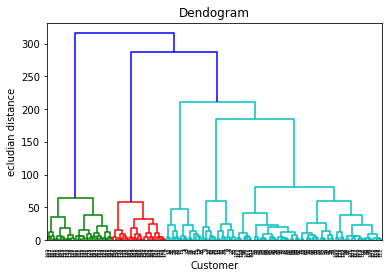

In [7]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
    
plt.title("Dendogram")
plt.xlabel("Customer")
plt.ylabel('ecludian distance')
plt.show()

<h3>Training the K-Means model on dataset</h3>

In [10]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

<h4>Visualizing The cluster</h4>

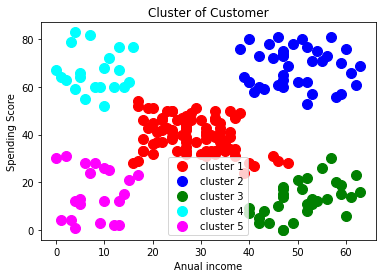

In [14]:
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='red', label="cluster 1")
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='blue', label="cluster 2")
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='green', label="cluster 3")
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s=100, c='cyan', label="cluster 4")
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s=100, c='magenta', label="cluster 5")

plt.title("Cluster of Customer")
plt.xlabel("Anual income")
plt.ylabel('Spending Score')
plt.legend()
plt.show()